# MNIST TEST USING HANDWRITTEN IMAGES 

Imported necessary libraries

In [ ]:
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
from mnist import Mnist

# Display the processed image

Resize and grayscale image

In [16]:
def prepare_image(image_path):
    # Read image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Could not load image {image_path}")
    
    # Threshold the image to make it purely black and white
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Find the bounding box of the digit
    coords = cv2.findNonZero(255 - image)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        # Add padding around the digit
        padding = 20
        x = max(0, x - padding)
        y = max(0, y - padding)
        w = min(image.shape[1] - x, w + 2*padding)
        h = min(image.shape[0] - y, h + 2*padding)
        image = image[y:y+h, x:x+w]
    
    # Create a square image with padding
    size = max(image.shape[0], image.shape[1])
    square_image = np.full((size, size), 255, dtype=np.uint8)
    
    # Center the digit in the square image
    y_offset = (size - image.shape[0]) // 2
    x_offset = (size - image.shape[1]) // 2
    square_image[y_offset:y_offset+image.shape[0], 
                x_offset:x_offset+image.shape[1]] = image
    
    # Resize to 28x28
    processed = cv2.resize(square_image, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Invert to make digit white on black background (MNIST format)
    processed = 255 - processed
    
    return processed

# Prepare and Display Image
This cell prepares the image for MNIST digit recognition by resizing and grayscaling it. The processed image is then displayed.

In [17]:
def test_image(image_path, true_digit):
    print(f"Processing image: {image_path}")
    
    try:
        # Load original image for display
        original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Process image for prediction
        processed = prepare_image(image_path)
        
        # Display both images
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(original, cmap='gray')
        plt.title("Original Image")
        plt.axis('on')
        
        plt.subplot(1, 2, 2)
        plt.imshow(processed, cmap='gray')
        plt.title("Processed Image (28x28)")
        plt.axis('on')
        plt.colorbar()
        
        plt.tight_layout()
        plt.show()
        
        # Make prediction
        mnist = Mnist()
        predicted_digit = mnist.predict(processed)
        
        if predicted_digit == true_digit:
            print(f"Success: Image {image_path} is for digit {true_digit} and recognized as {predicted_digit}")
        else:
            print(f"Fail: Image {image_path} is for digit {true_digit}, but the inference result is {predicted_digit}")
            
    except Exception as e:
        print(f"Error processing image: {e}")
        raise

Test using module5-3.py in jupyter notebook

In [78]:
!python module5-3.py "Custom_MNIST_Samples/Digit 7/7_4.png" 7

Processing image: Custom_MNIST_Samples/Digit 7/7_4.png
Figure(1000x400)
Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 7/7_4.png is for digit 7 but the inference result is 4


# MNIST TEST USING HANDWRITTEN IMAGES 

Processing image: Custom_MNIST_Samples/Digit 0/0_0.png


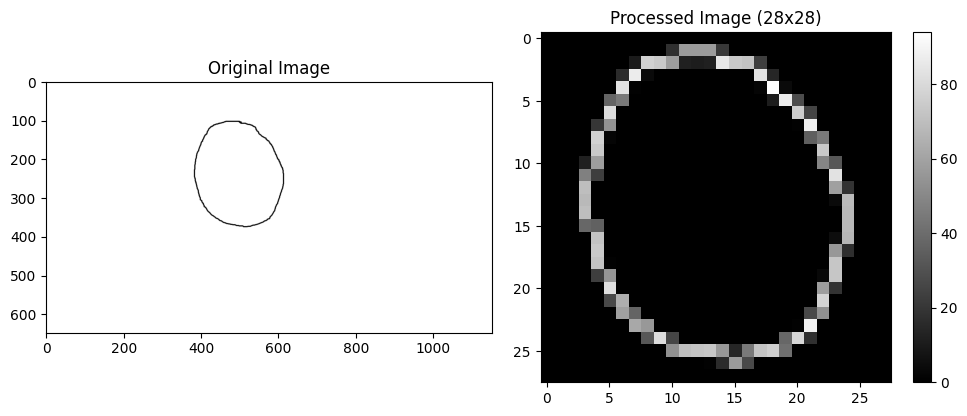

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 0/0_0.png is for digit 0, but the inference result is 7


In [19]:
image_path = "Custom_MNIST_Samples/Digit 0/0_0.png"  # Replace with your image file path
true_digit = 0  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 0/0_1.png


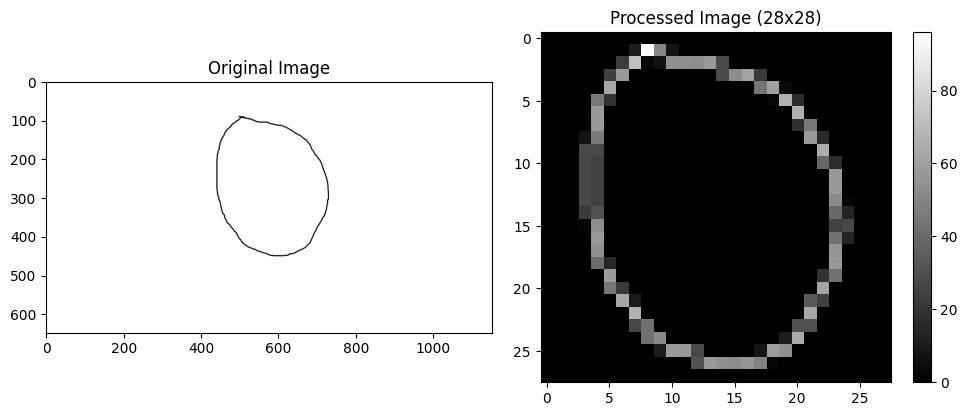

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 0/0_1.png is for digit 0, but the inference result is 5


In [20]:
image_path = "Custom_MNIST_Samples/Digit 0/0_1.png"  # Replace with your image file path
true_digit = 0  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 0/0_2.png


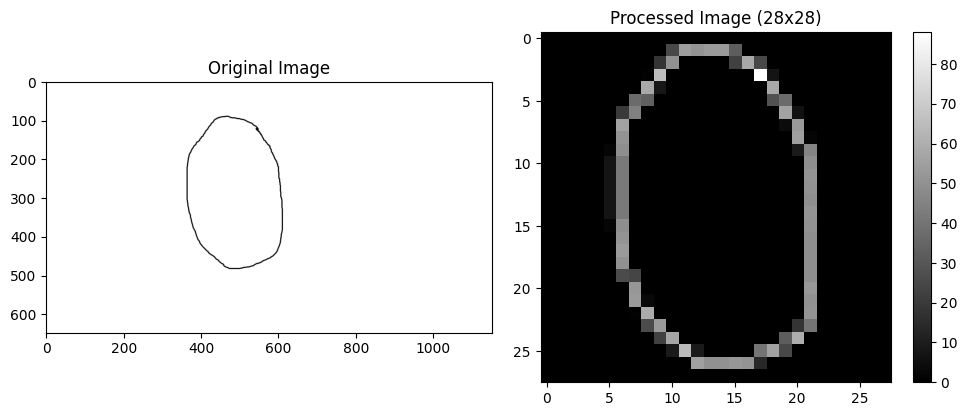

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 0/0_2.png is for digit 0, but the inference result is 7


In [21]:
image_path = "Custom_MNIST_Samples/Digit 0/0_2.png"  # Replace with your image file path
true_digit = 0  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 0/0_3.png


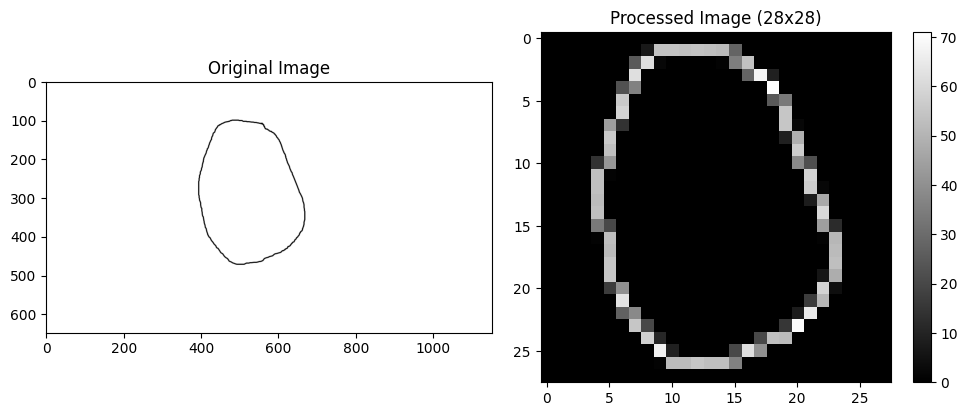

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 0/0_3.png is for digit 0, but the inference result is 7


In [22]:
image_path = "Custom_MNIST_Samples/Digit 0/0_3.png"  # Replace with your image file path
true_digit = 0  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 0/0_4.png


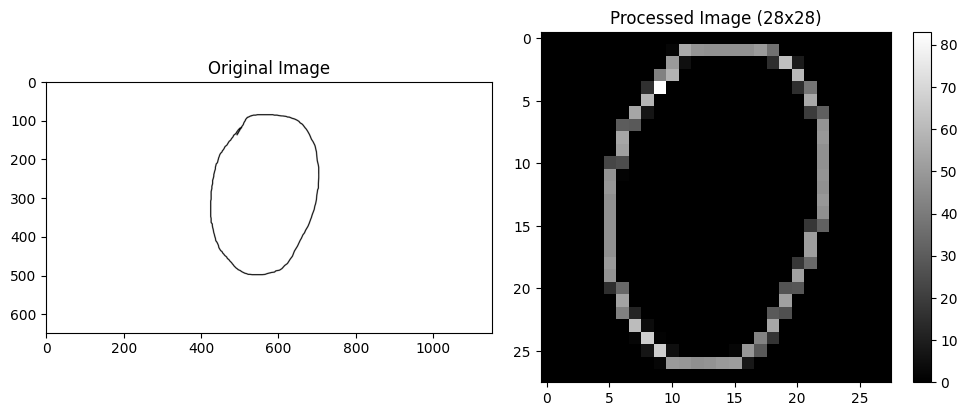

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 0/0_4.png is for digit 0, but the inference result is 7


In [23]:
image_path = "Custom_MNIST_Samples/Digit 0/0_4.png"  # Replace with your image file path
true_digit = 0  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 1/1_0.png


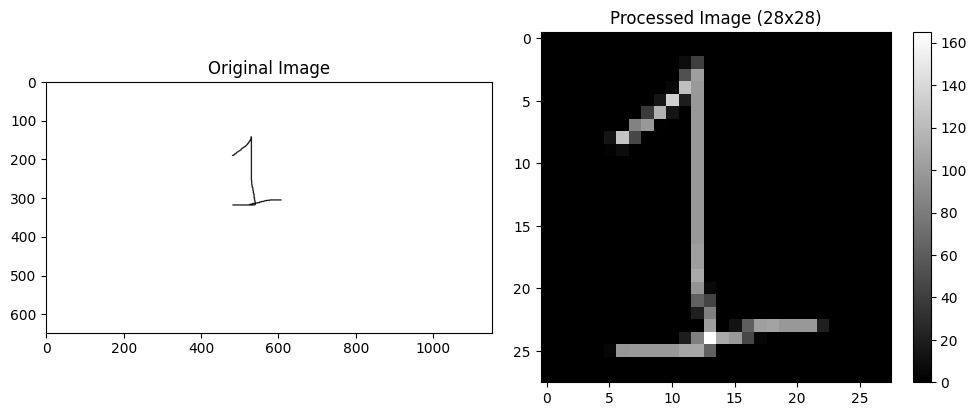

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 1/1_0.png is for digit 1, but the inference result is 5


In [25]:
image_path = "Custom_MNIST_Samples/Digit 1/1_0.png"  # Replace with your image file path
true_digit = 1  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 1/1_1.png


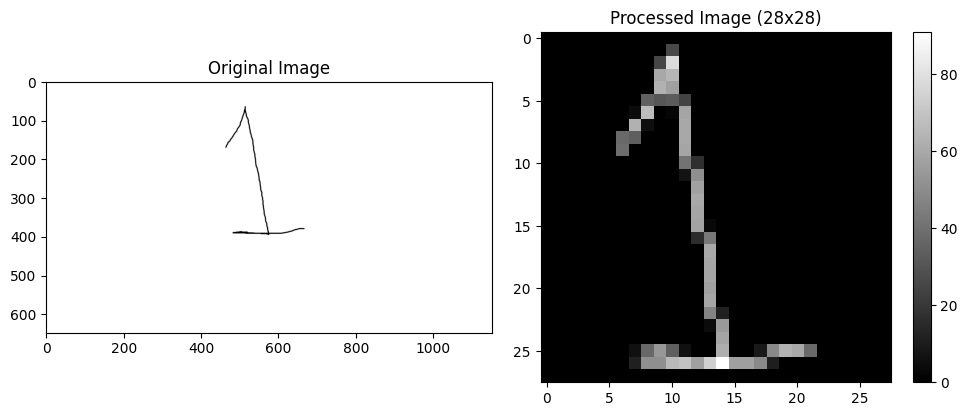

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 1/1_1.png is for digit 1, but the inference result is 7


In [26]:
image_path = "Custom_MNIST_Samples/Digit 1/1_1.png"  # Replace with your image file path
true_digit = 1  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 1/1_2.png


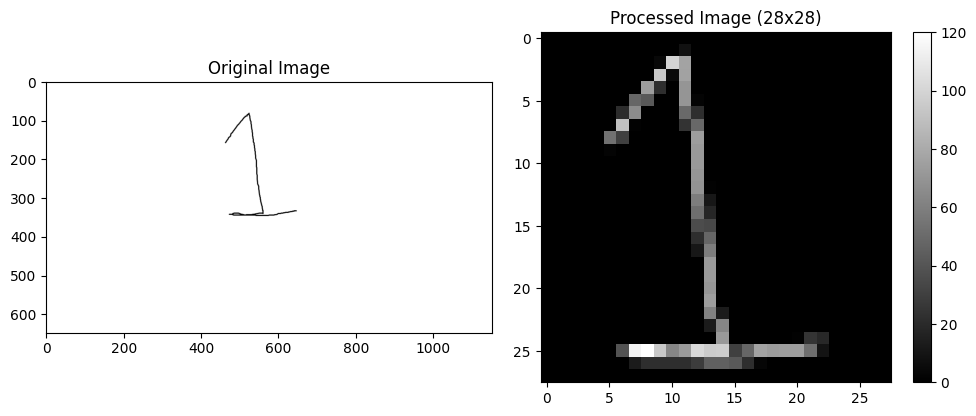

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 1/1_2.png is for digit 1, but the inference result is 7


In [27]:
image_path = "Custom_MNIST_Samples/Digit 1/1_2.png"  # Replace with your image file path
true_digit = 1  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 1/1_3.png


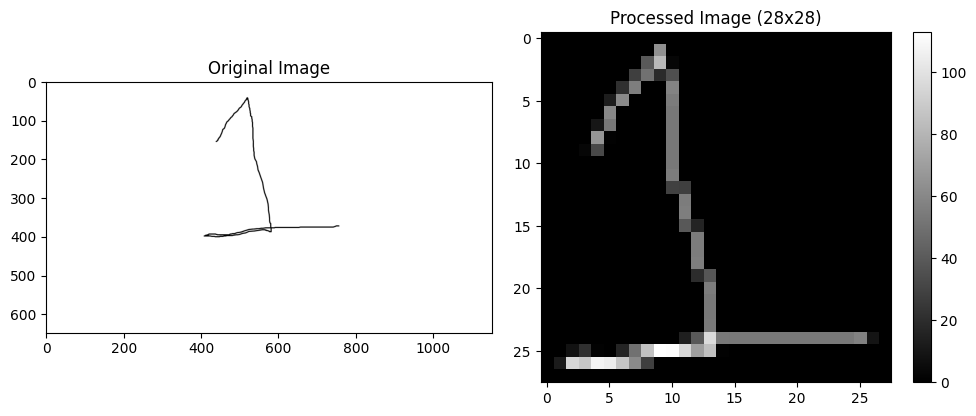

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 1/1_3.png is for digit 1, but the inference result is 5


In [28]:
image_path = "Custom_MNIST_Samples/Digit 1/1_3.png"  # Replace with your image file path
true_digit = 1  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 1/1_4.png


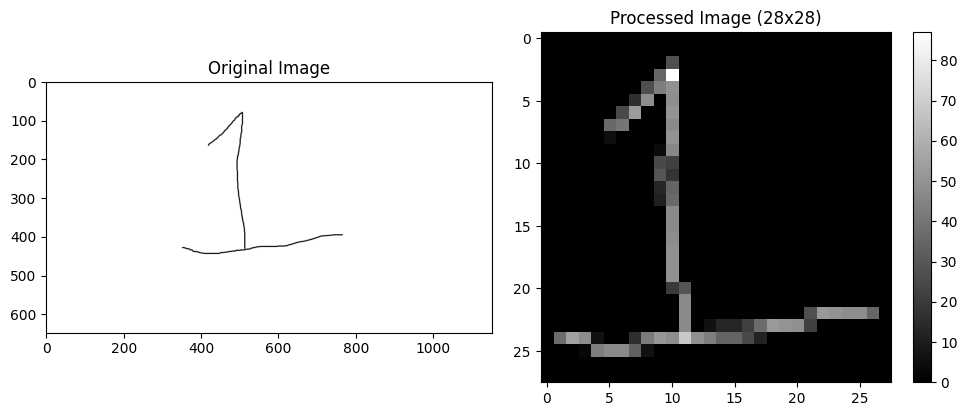

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 1/1_4.png is for digit 1, but the inference result is 5


In [29]:
image_path = "Custom_MNIST_Samples/Digit 1/1_4.png"  # Replace with your image file path
true_digit = 1  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 2/2_0.png


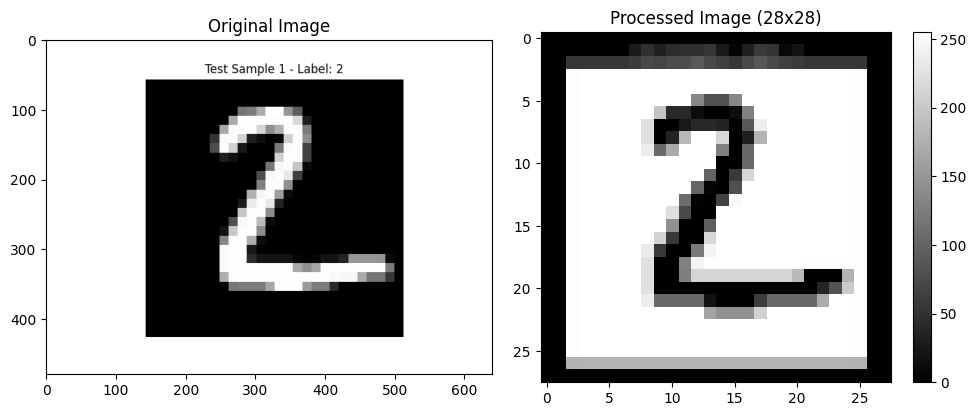

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 2/2_0.png is for digit 2, but the inference result is 3


In [30]:
image_path = "Custom_MNIST_Samples/Digit 2/2_0.png"  # Replace with your image file path
true_digit = 2  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 2/2_1.png


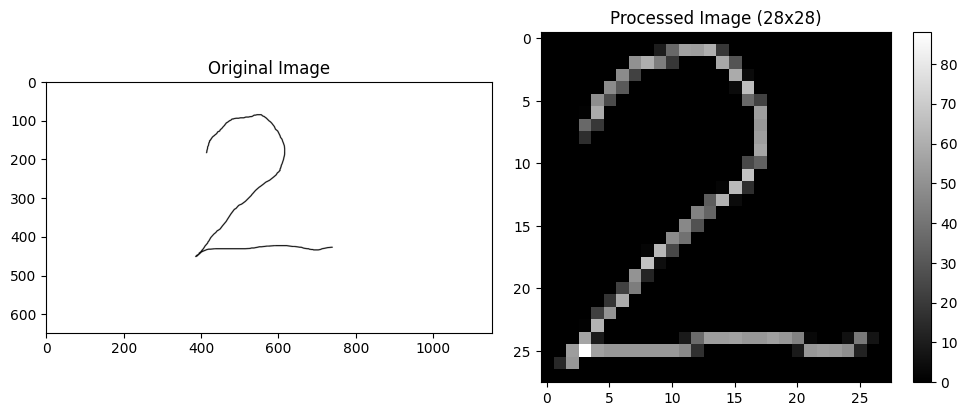

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 2/2_1.png is for digit 2, but the inference result is 5


In [31]:
image_path = "Custom_MNIST_Samples/Digit 2/2_1.png"  # Replace with your image file path
true_digit = 2  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 2/2_2.png


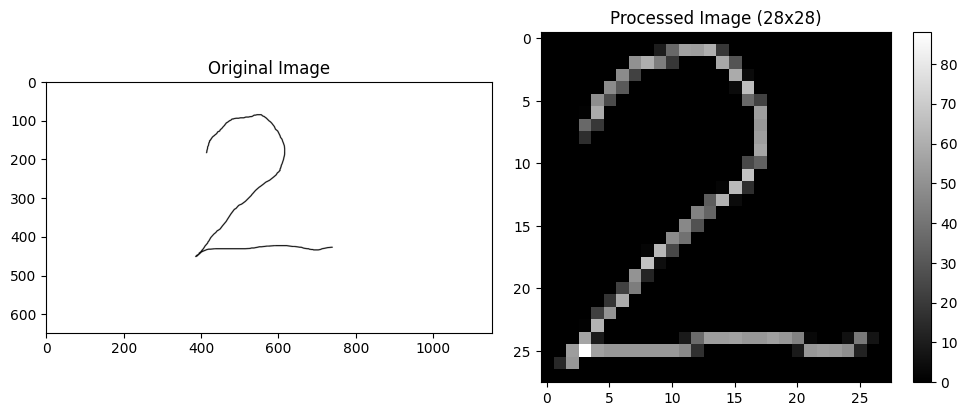

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 2/2_2.png is for digit 2, but the inference result is 5


In [32]:
image_path = "Custom_MNIST_Samples/Digit 2/2_2.png"  # Replace with your image file path
true_digit = 2  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 2/2_3.png


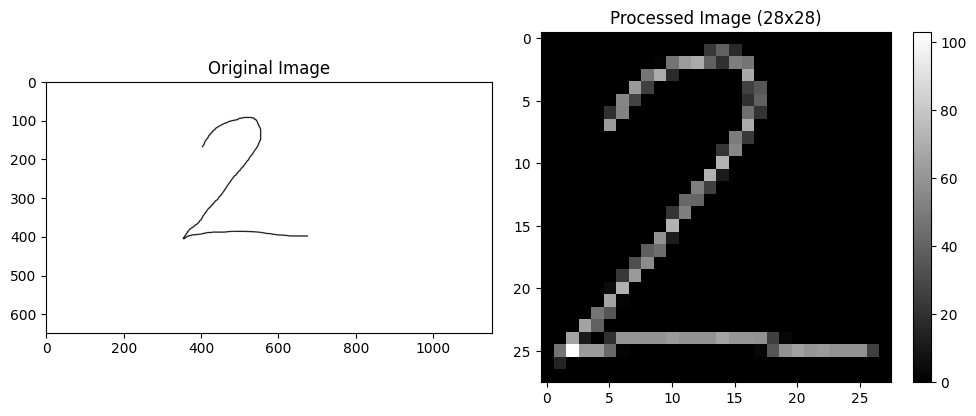

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 2/2_3.png is for digit 2, but the inference result is 5


In [33]:
image_path = "Custom_MNIST_Samples/Digit 2/2_3.png"  # Replace with your image file path
true_digit = 2  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 2/2_4.png


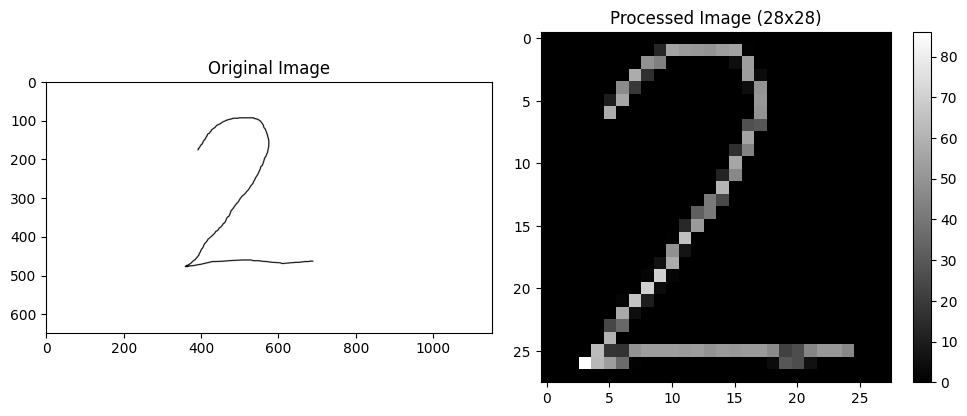

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 2/2_4.png is for digit 2, but the inference result is 7


In [34]:
image_path = "Custom_MNIST_Samples/Digit 2/2_4.png"  # Replace with your image file path
true_digit = 2  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 3/3_0.png


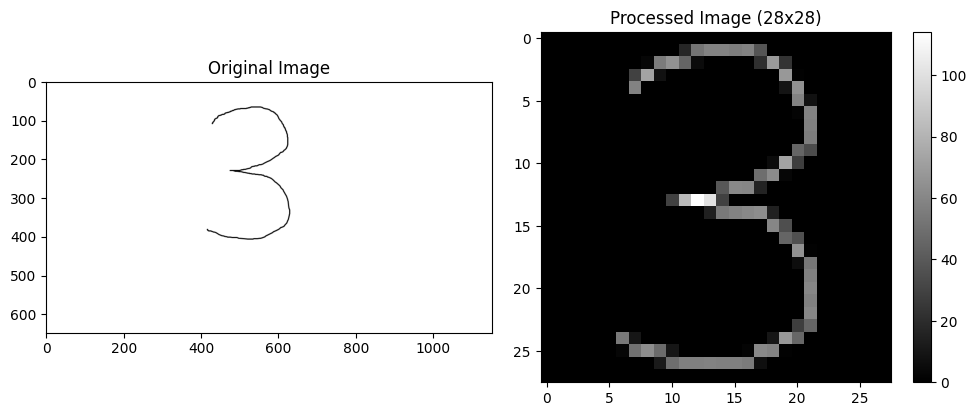

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 3/3_0.png is for digit 3, but the inference result is 7


In [37]:
image_path = "Custom_MNIST_Samples/Digit 3/3_0.png"  # Replace with your image file path
true_digit = 3  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 3/3_1.png


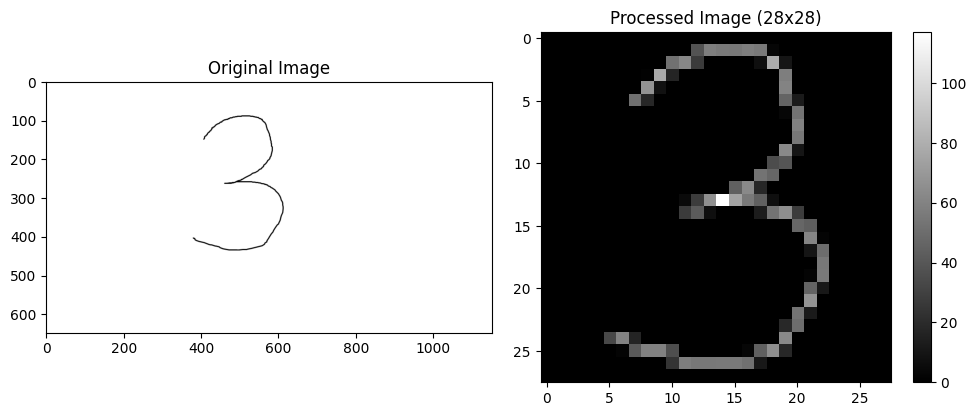

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 3/3_1.png is for digit 3, but the inference result is 7


In [36]:
image_path = "Custom_MNIST_Samples/Digit 3/3_1.png"  # Replace with your image file path
true_digit = 3  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 3/3_2.png


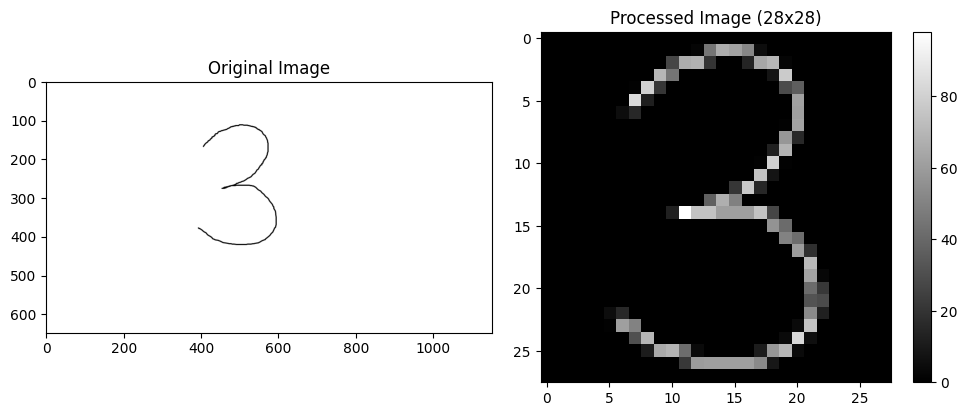

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 3/3_2.png is for digit 3, but the inference result is 7


In [38]:
image_path = "Custom_MNIST_Samples/Digit 3/3_2.png"  # Replace with your image file path
true_digit = 3  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 3/3_3.png


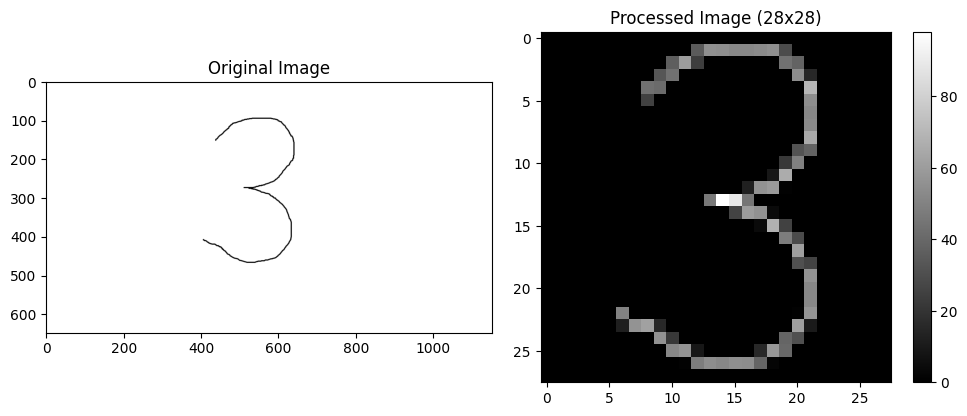

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 3/3_3.png is for digit 3, but the inference result is 7


In [39]:
image_path = "Custom_MNIST_Samples/Digit 3/3_3.png"  # Replace with your image file path
true_digit = 3  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 3/3_4.png


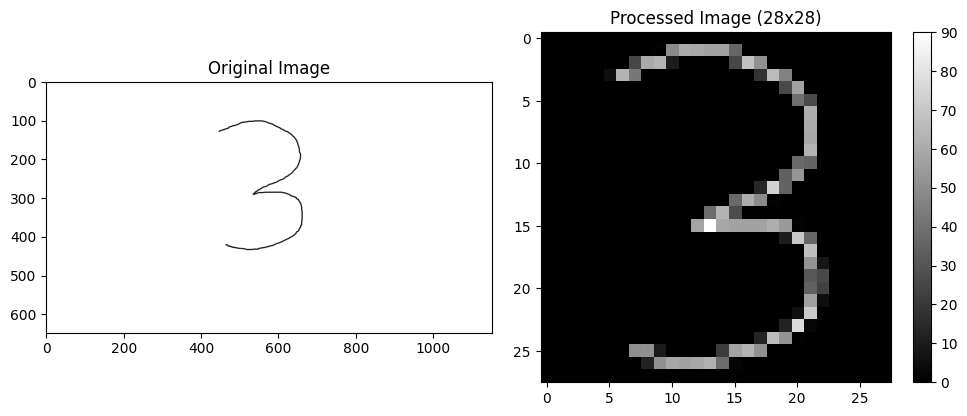

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 3/3_4.png is for digit 3, but the inference result is 7


In [40]:
image_path = "Custom_MNIST_Samples/Digit 3/3_4.png"  # Replace with your image file path
true_digit = 3  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 4/4_0.png


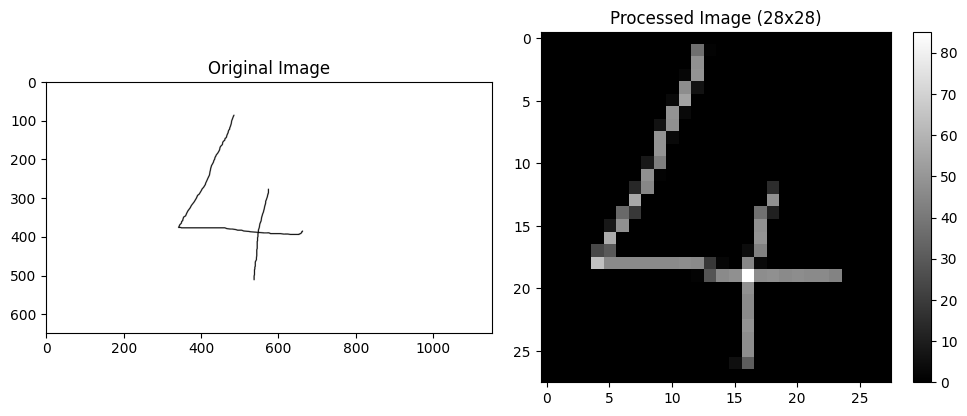

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 4/4_0.png is for digit 4, but the inference result is 5


In [41]:
image_path = "Custom_MNIST_Samples/Digit 4/4_0.png"  # Replace with your image file path
true_digit = 4  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 4/4_1.png


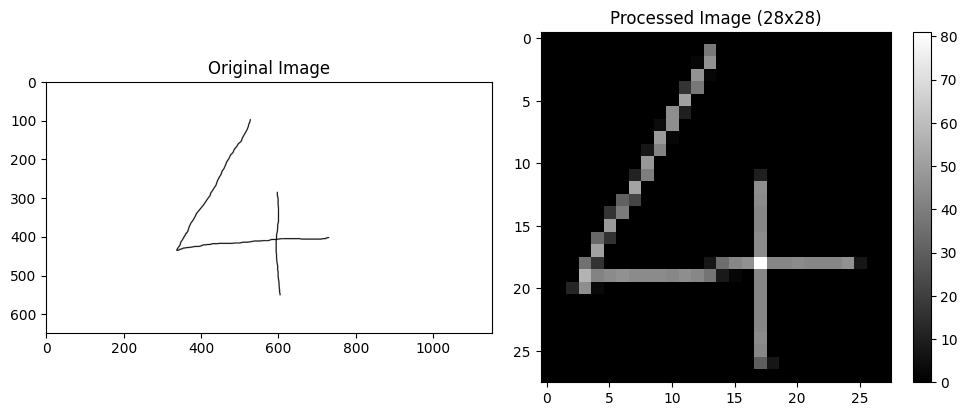

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 4/4_1.png is for digit 4, but the inference result is 5


In [42]:
image_path = "Custom_MNIST_Samples/Digit 4/4_1.png"  # Replace with your image file path
true_digit = 4  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 4/4_2.png


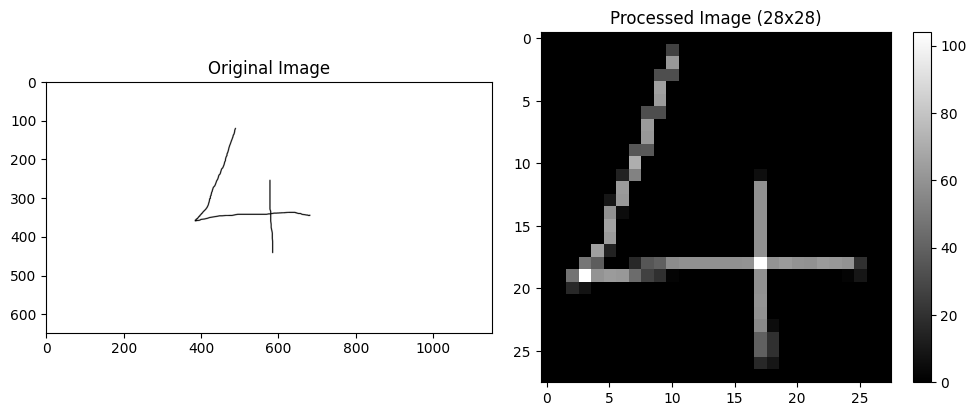

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 4/4_2.png is for digit 4, but the inference result is 5


In [43]:
image_path = "Custom_MNIST_Samples/Digit 4/4_2.png"  # Replace with your image file path
true_digit = 4  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 4/4_3.png


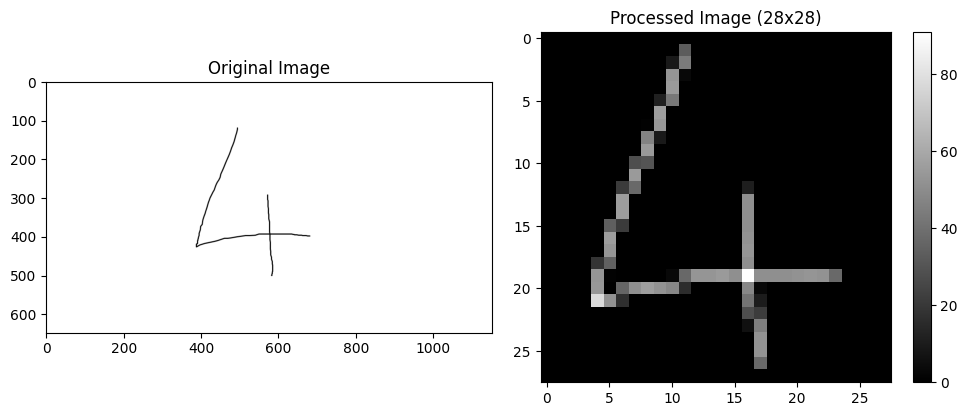

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 4/4_3.png is for digit 4, but the inference result is 5


In [44]:
image_path = "Custom_MNIST_Samples/Digit 4/4_3.png"  # Replace with your image file path
true_digit = 4  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 4/4_4.png


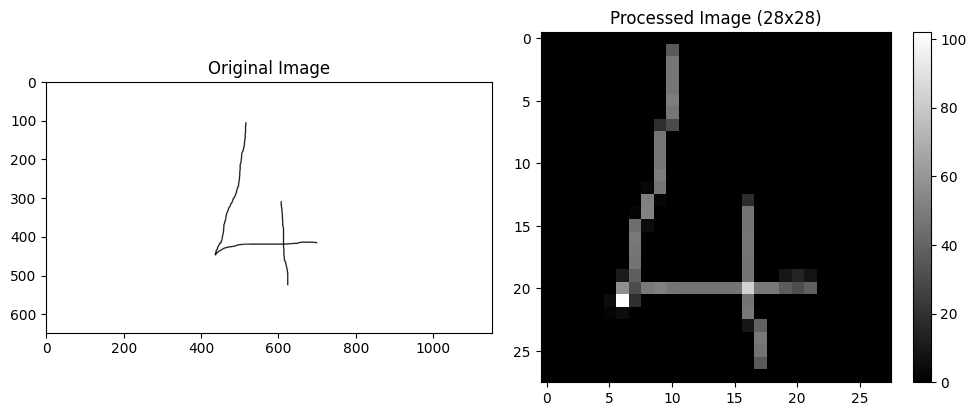

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 4/4_4.png is for digit 4, but the inference result is 5


In [45]:
image_path = "Custom_MNIST_Samples/Digit 4/4_4.png"  # Replace with your image file path
true_digit = 4  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 5/5_0.png


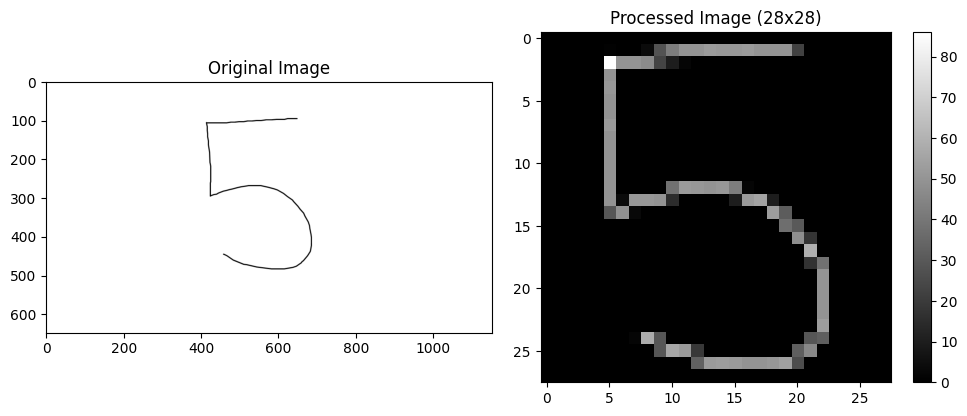

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 5/5_0.png is for digit 5, but the inference result is 7


In [46]:
image_path = "Custom_MNIST_Samples/Digit 5/5_0.png"  # Replace with your image file path
true_digit = 5  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 5/5_1.png


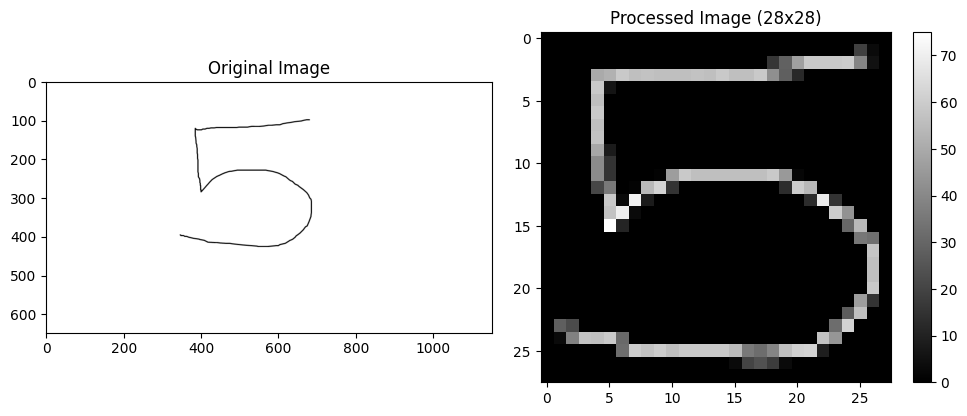

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 5/5_1.png is for digit 5, but the inference result is 7


In [47]:
image_path = "Custom_MNIST_Samples/Digit 5/5_1.png"  # Replace with your image file path
true_digit = 5  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 5/5_2.png


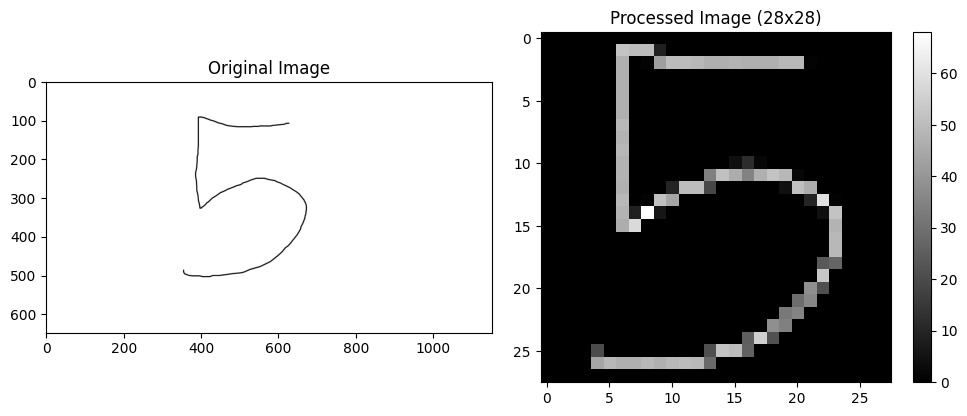

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 5/5_2.png is for digit 5, but the inference result is 7


In [48]:
image_path = "Custom_MNIST_Samples/Digit 5/5_2.png"  # Replace with your image file path
true_digit = 5  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 5/5_3.png


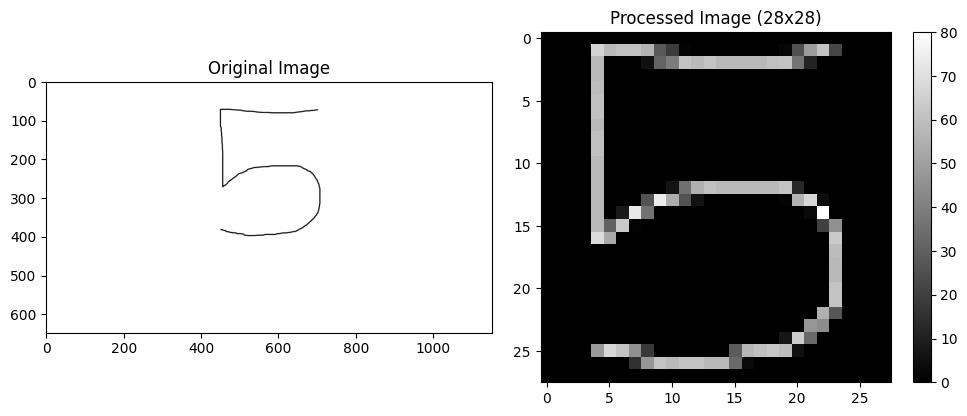

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 5/5_3.png is for digit 5, but the inference result is 7


In [49]:
image_path = "Custom_MNIST_Samples/Digit 5/5_3.png"  # Replace with your image file path
true_digit = 5  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 5/5_4.png


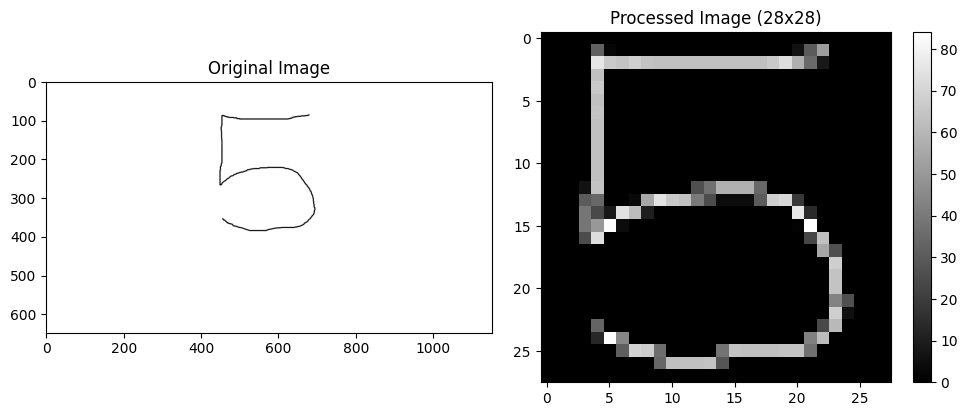

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 5/5_4.png is for digit 5, but the inference result is 7


In [50]:
image_path = "Custom_MNIST_Samples/Digit 5/5_4.png"  # Replace with your image file path
true_digit = 5  # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 6/6_0.png


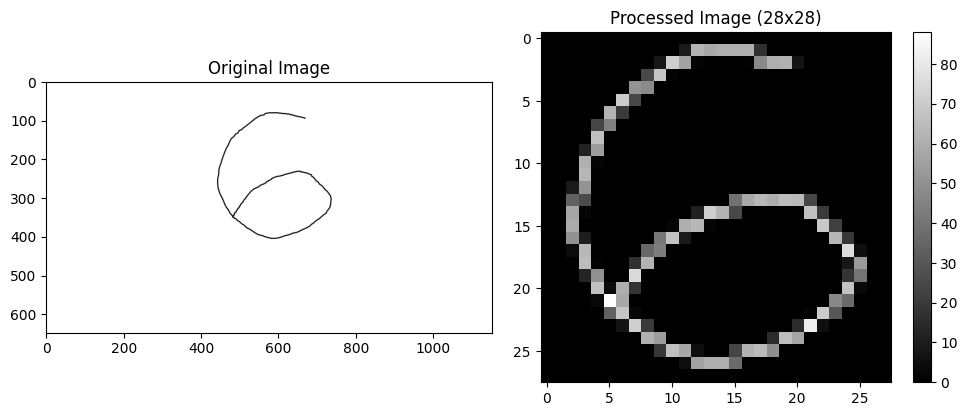

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 6/6_0.png is for digit 6, but the inference result is 7


In [51]:
image_path = "Custom_MNIST_Samples/Digit 6/6_0.png"  # Replace with your image file path
true_digit =  6 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 6/6_1.png


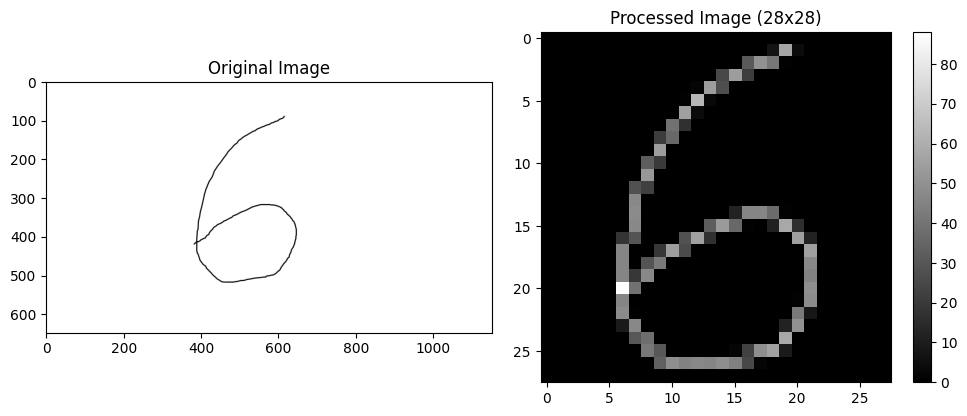

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 6/6_1.png is for digit 6, but the inference result is 5


In [52]:
image_path = "Custom_MNIST_Samples/Digit 6/6_1.png"  # Replace with your image file path
true_digit =  6 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 6/6_2.png


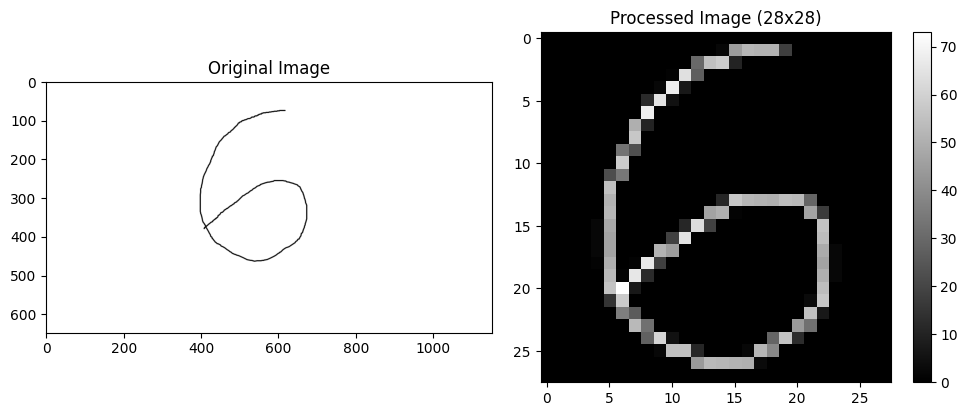

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 6/6_2.png is for digit 6, but the inference result is 5


In [53]:
image_path = "Custom_MNIST_Samples/Digit 6/6_2.png"  # Replace with your image file path
true_digit =  6 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 6/6_3.png


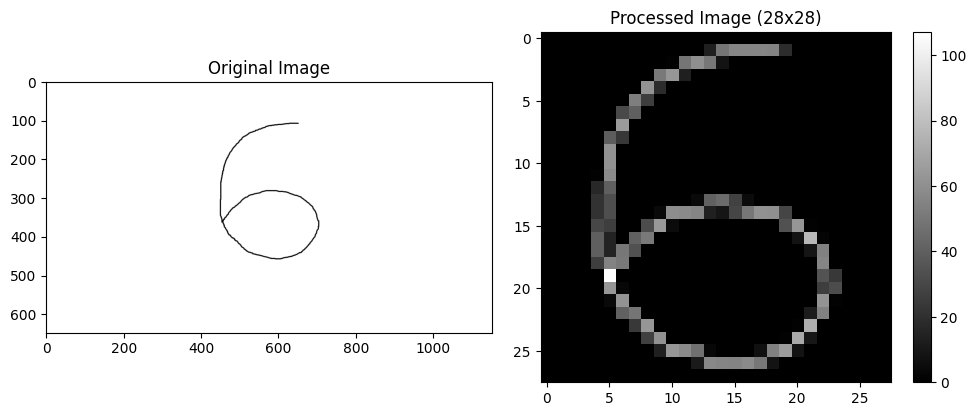

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 6/6_3.png is for digit 6, but the inference result is 7


In [54]:
image_path = "Custom_MNIST_Samples/Digit 6/6_3.png"  # Replace with your image file path
true_digit =  6 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 6/6_4.png


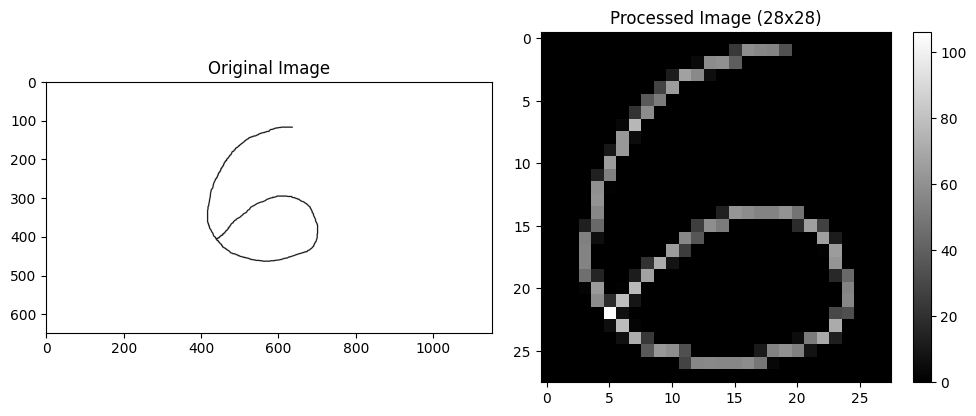

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 6/6_4.png is for digit 6, but the inference result is 7


In [55]:
image_path = "Custom_MNIST_Samples/Digit 6/6_4.png"  # Replace with your image file path
true_digit =  6 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 7/7_0.png


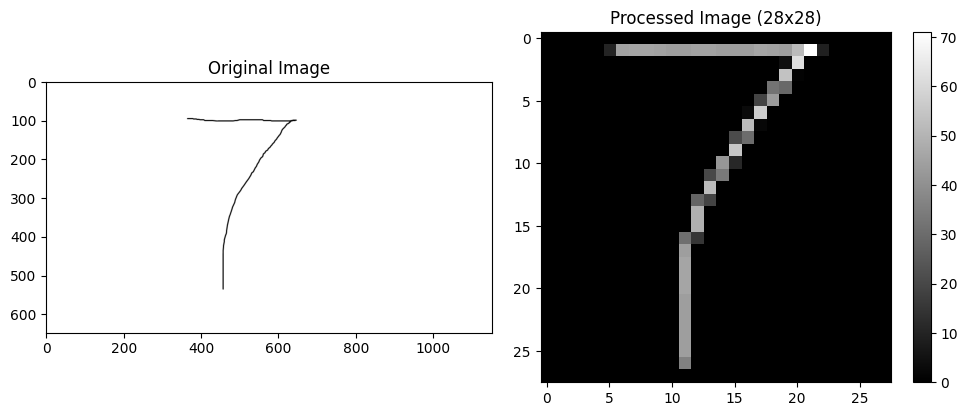

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 7/7_0.png is for digit 7, but the inference result is 5


In [57]:
image_path = "Custom_MNIST_Samples/Digit 7/7_0.png"  # Replace with your image file path
true_digit =  7 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 7/7_1.png


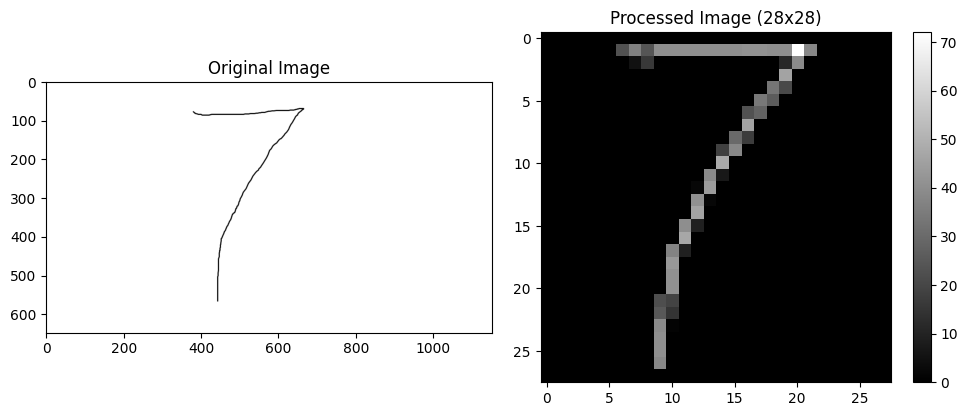

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 7/7_1.png is for digit 7, but the inference result is 5


In [58]:
image_path = "Custom_MNIST_Samples/Digit 7/7_1.png"  # Replace with your image file path
true_digit =  7 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 7/7_2.png


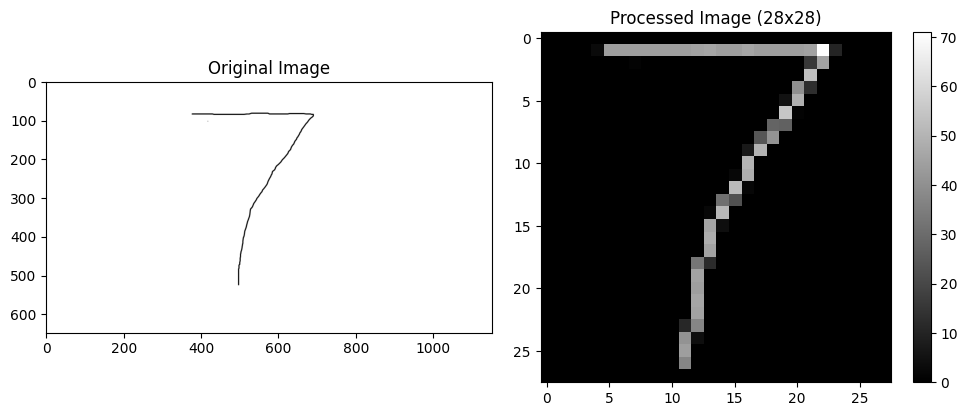

Weights loaded successfully
Success: Image Custom_MNIST_Samples/Digit 7/7_2.png is for digit 7 and recognized as 7


In [59]:
image_path = "Custom_MNIST_Samples/Digit 7/7_2.png"  # Replace with your image file path
true_digit =  7 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 7/7_3.png


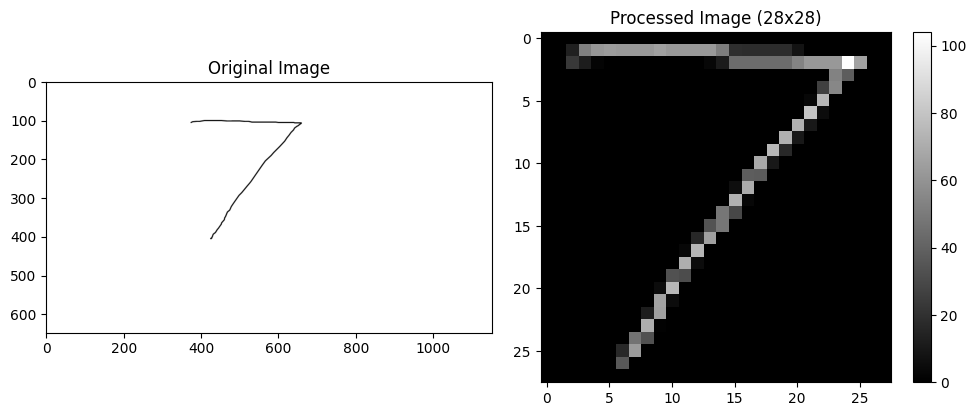

Weights loaded successfully
Success: Image Custom_MNIST_Samples/Digit 7/7_3.png is for digit 7 and recognized as 7


In [60]:
image_path = "Custom_MNIST_Samples/Digit 7/7_3.png"  # Replace with your image file path
true_digit =  7 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 7/7_4.png


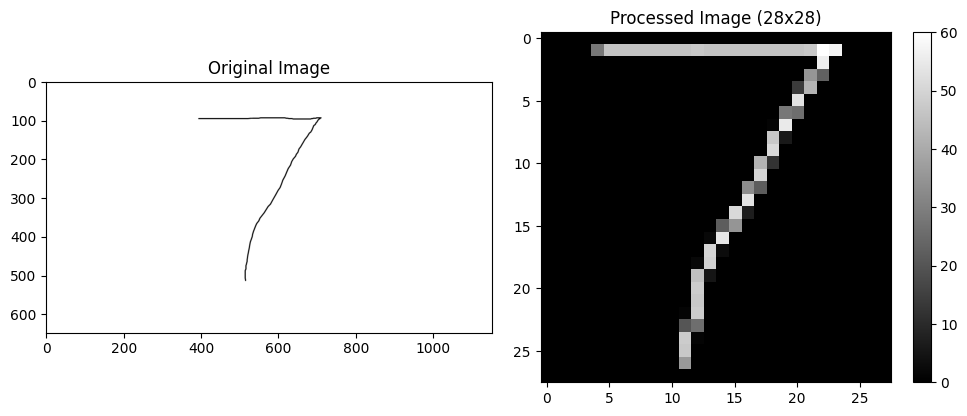

Weights loaded successfully
Success: Image Custom_MNIST_Samples/Digit 7/7_4.png is for digit 7 and recognized as 7


In [62]:
image_path = "Custom_MNIST_Samples/Digit 7/7_4.png"  # Replace with your image file path
true_digit =  7 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 8/8_0.png


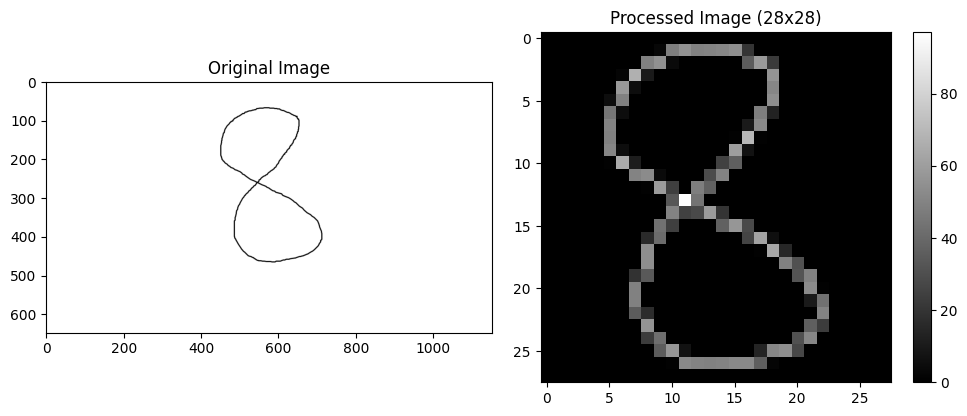

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 8/8_0.png is for digit 8, but the inference result is 5


In [63]:
image_path = "Custom_MNIST_Samples/Digit 8/8_0.png"  # Replace with your image file path
true_digit =  8 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 8/8_1.png


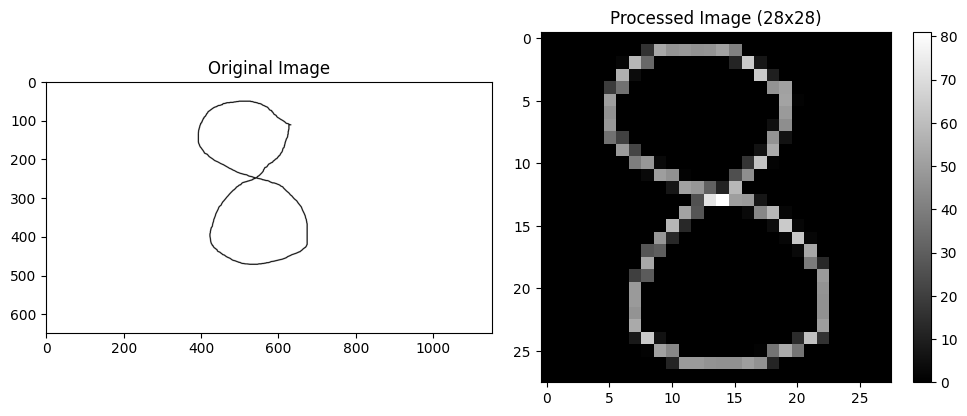

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 8/8_1.png is for digit 8, but the inference result is 5


In [64]:
image_path = "Custom_MNIST_Samples/Digit 8/8_1.png"  # Replace with your image file path
true_digit =  8 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 8/8_2.png


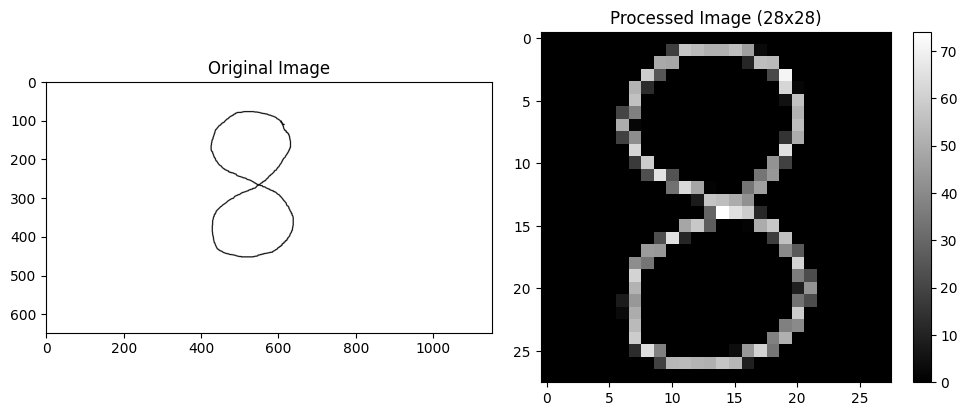

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 8/8_2.png is for digit 8, but the inference result is 5


In [65]:
image_path = "Custom_MNIST_Samples/Digit 8/8_2.png"  # Replace with your image file path
true_digit =  8 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 8/8_3.png


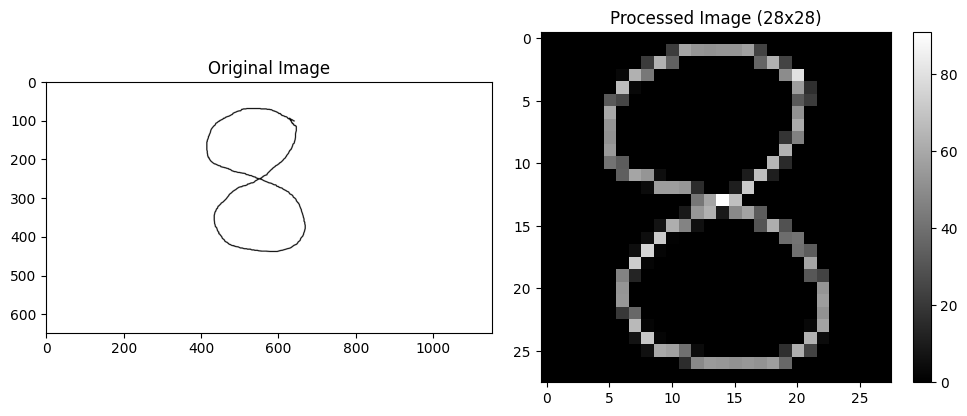

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 8/8_3.png is for digit 8, but the inference result is 5


In [66]:
image_path = "Custom_MNIST_Samples/Digit 8/8_3.png"  # Replace with your image file path
true_digit =  8 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 8/8_4.png


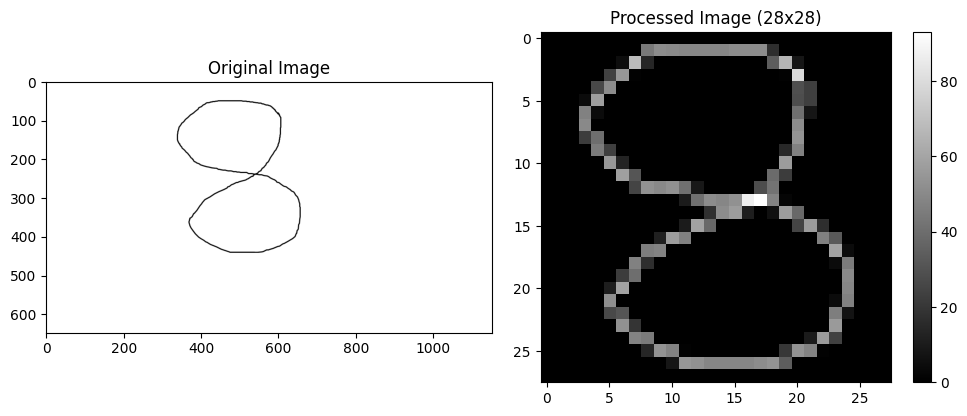

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 8/8_4.png is for digit 8, but the inference result is 7


In [67]:
image_path = "Custom_MNIST_Samples/Digit 8/8_4.png"  # Replace with your image file path
true_digit =  8 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 9/9_0.png


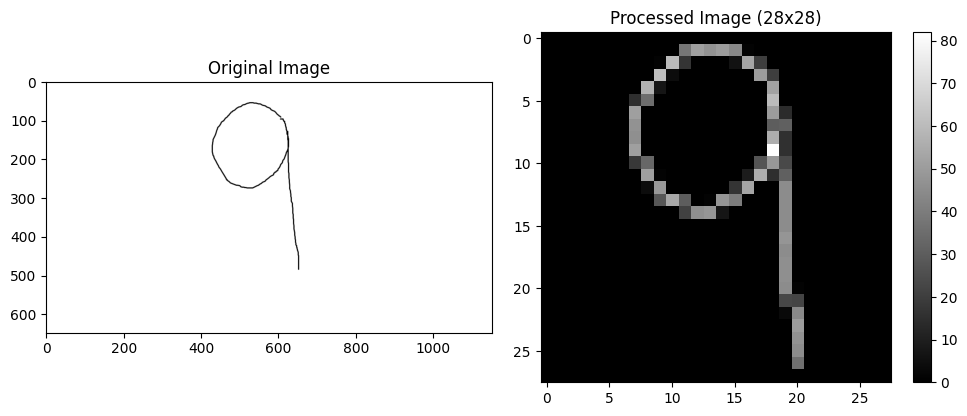

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 9/9_0.png is for digit 9, but the inference result is 7


In [68]:
image_path = "Custom_MNIST_Samples/Digit 9/9_0.png"  # Replace with your image file path
true_digit =  9 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 9/9_1.png


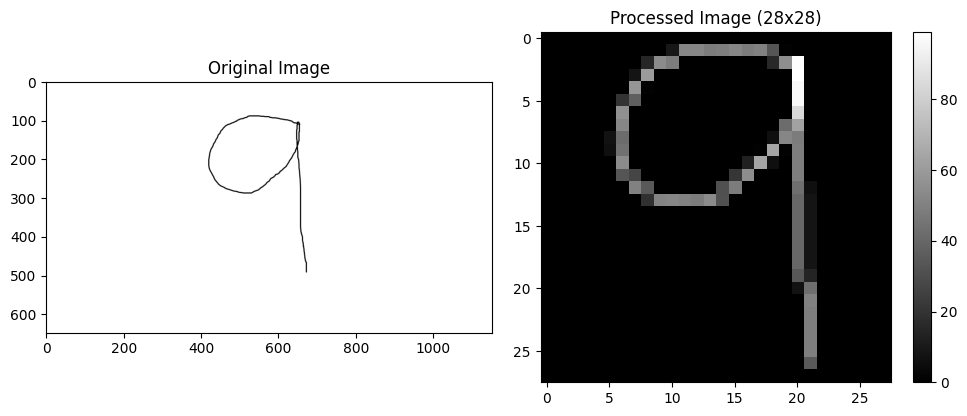

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 9/9_1.png is for digit 9, but the inference result is 7


In [69]:
image_path = "Custom_MNIST_Samples/Digit 9/9_1.png"  # Replace with your image file path
true_digit =  9 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 9/9_2.png


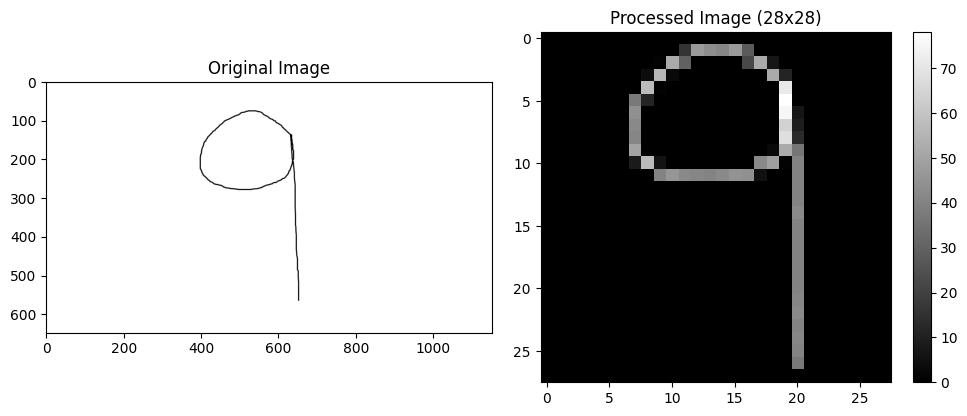

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 9/9_2.png is for digit 9, but the inference result is 7


In [70]:
image_path = "Custom_MNIST_Samples/Digit 9/9_2.png"  # Replace with your image file path
true_digit =  9 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 9/9_3.png


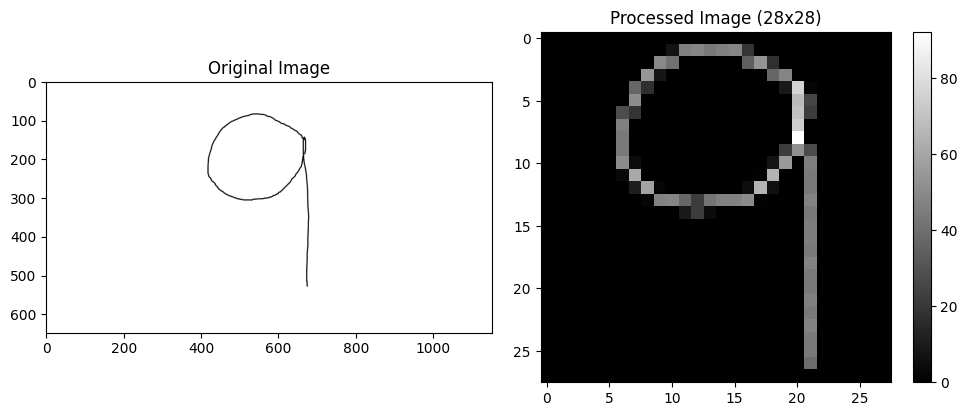

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 9/9_3.png is for digit 9, but the inference result is 7


In [71]:
image_path = "Custom_MNIST_Samples/Digit 9/9_3.png"  # Replace with your image file path
true_digit =  9 # Replace with the true digit

test_image(image_path, true_digit)

Processing image: Custom_MNIST_Samples/Digit 9/9_4.png


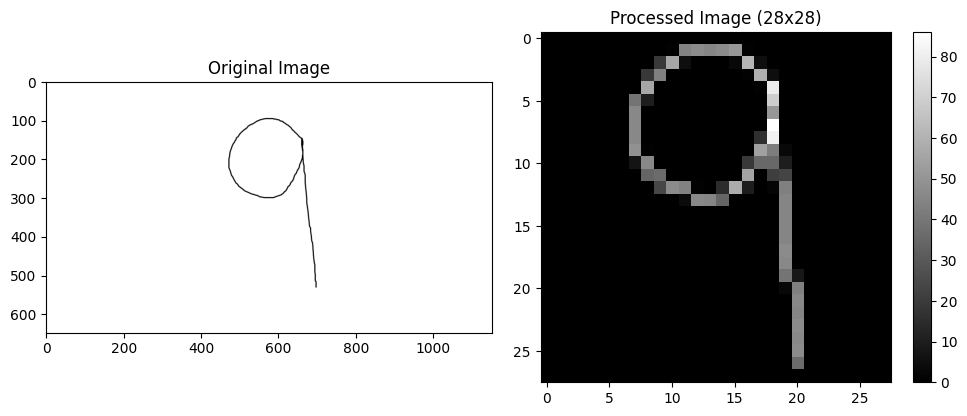

Weights loaded successfully
Fail: Image Custom_MNIST_Samples/Digit 9/9_4.png is for digit 9, but the inference result is 7


In [72]:
image_path = "Custom_MNIST_Samples/Digit 9/9_4.png"  # Replace with your image file path
true_digit =  9 # Replace with the true digit

test_image(image_path, true_digit)

In [5]:
!python module5-3.py 4_0.png 4

Processing image: c:\Users\shubdosh\Desktop\ece5831\05-3\Custom MNIST Samples\Digit 4\4_0.png
Figure(1000x400)
Weights loaded successfully
Fail: Image c:\Users\shubdosh\Desktop\ece5831\05-3\Custom MNIST Samples\Digit 4\4_0.png for digit 4 is recognized as 3


c:\Users\shubdosh\Desktop\ece5831\05-3\mnist.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [6]:
!python module5-3.py 7_3.png 7

Processing image: c:\Users\shubdosh\Desktop\ece5831\05-3\Custom MNIST Samples\Digit 7\7_3.png
Figure(1000x400)
Weights loaded successfully
Fail: Image c:\Users\shubdosh\Desktop\ece5831\05-3\Custom MNIST Samples\Digit 7\7_3.png for digit 7 is recognized as 3


c:\Users\shubdosh\Desktop\ece5831\05-3\mnist.py:37: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
